In [19]:
# imports

import csv
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import copy

In [35]:
portfolios = {}
# example:
# portfolios["old_timers"] # portfolio
# portfolios["old_timers"]["Tobin Portfolio"] = [quantity, price]

In [36]:
# type
# normal, baseload, middle
TYPE = "normal"

In [39]:
# go through and collect the data into python arrays

with open('carbon_csv.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    count = 0
    current_portfolio_name = None
    skip_again = False
    for row in csv_reader:
        count += 1
        if count < 3:
            continue
            
        portfolio_name, asset, quantity, price = row[0], row[1], row[2], row[9]
        
        if portfolio_name not in portfolios:
            portfolios[portfolio_name] = {}

        portfolios[portfolio_name][asset] = [float(quantity), float(price)]
        
portfolios_saved_copy = copy.deepcopy(portfolios)

In [42]:
demands = []

with open('demand_forecasts.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    count = -1
    for row in csv_reader:
        count += 1
        if count < 2:
            continue
            
        float_day_forcast = []
        for i in row[2:]:
            float_day_forcast.append(float(i))
            
        demands.append(np.array(float_day_forcast))
        count += 1

demands = np.array(demands)

In [43]:
def calculate_market_clearing_price(quantity_to_cross, graph=False):
    
    quantities_and_prices = []

    for portfolio_name in portfolios.keys():
        portfolio = portfolios[portfolio_name]
        for asset_name in portfolio.keys():
            quantity, price = portfolio[asset_name]
            point = (quantity, price)
            quantities_and_prices.append(point)
            
    # sort by the prices
    sorted_quantities_and_prices = sorted(quantities_and_prices, key=lambda x: x[1])
    
    x_quantities = np.array([i[0] for i in sorted_quantities_and_prices])
    # sum of quantities
    sum_of_quants = []
    running_sum = 0
    for q in x_quantities:
        running_sum += q
        sum_of_quants.append(running_sum)
    sum_of_quants = np.array(sum_of_quants)

    y_prices = np.array([i[1] for i in sorted_quantities_and_prices])
    
    if graph:
        plt.step(sum_of_quants, y_prices)
        plt.title("Aggregate Supply Curve")
        plt.xlabel('Capacity')
        plt.ylabel('Price ($/MWH)')
        plt.show()
        
        
    # take the quantity and return the clearning price
    index = 0
    for i in range(len(sum_of_quants)):
        if sum_of_quants[i] > quantity_to_cross:
            # previous quantity is where the
            index = i
            break
    return y_prices[index]


In [44]:
test_quantity = 16000
market_clearing_price = calculate_market_clearing_price(test_quantity)

print("market_clearning_price", market_clearing_price)



('market_clearning_price', 54.54740114)


In [45]:
portfolios.keys()

['Phelps Portfolio',
 'Modigliani Portfolio',
 'Ostrom Portfolio',
 'Nash Portfolio',
 'Samuelson Portfolio',
 'Tobin Portfolio',
 'Vickrey Portfolio']

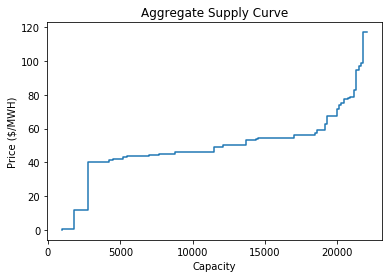

('profit without modifications', 45149.74501650001)


In [47]:
# calculate profit

portfolio_name = "Old_Timers"
day_number = 0
hour = 2
estimated_quantity = demands[day_number][hour]
market_clearning_price = calculate_market_clearing_price(estimated_quantity, graph=True)

def get_profit_for_portfolio(portfolio_name, clearning_price):
    portfolio = portfolios[portfolio_name]
    profit = 0
    for q, asset_p in portfolio.values():
        if asset_p < clearning_price:
            profit += q*(clearning_price - asset_p)
    return profit


profit = get_profit_for_portfolio("Phelps Portfolio", market_clearning_price)

print("profit without modifications", profit)


In [51]:
for portfolio in portfolios.keys():
    total_profit = 0.0
    for day_number in range(3, 6):
        for hour in range(0, 4):
            estimated_quantity = demands[day_number][hour]
            market_clearning_price = calculate_market_clearing_price(estimated_quantity, graph=False)
            
            profit = get_profit_for_portfolio(portfolio, market_clearning_price)
            
            total_profit += profit
            
    print("{}, {}".format(portfolio, total_profit))


Phelps Portfolio, 467314.30287
Modigliani Portfolio, 216989.596492
Ostrom Portfolio, 339036.33777
Nash Portfolio, 145439.459894
Samuelson Portfolio, 176775.510774
Tobin Portfolio, 690998.088366
Vickrey Portfolio, 1030708.25317
